In [1]:
import urbanpy as up
import pandas as pd
import geopandas as gpd
import contextily as cx
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

In [2]:
df = pd.read_excel("/home/claudio/Downloads/Análisis_de_las_Ollas_Comunes_Lima_Metropolitana_-_all_versions_-_labels_-_2023-02-23-01-03-45.xlsx")

In [3]:
df.head()

,start,end,Nombre de la olla común,Nombre de la persona responsable (Presidente/a),Teléfono de la persona de contacto,Dirección de la olla común,Distrito de la olla común,¿Dónde cocina la olla común?,"Por favor, especifique:","¿Cuándo comenzó a funcionar la olla común? (colocar mes y año, ejemplo: enero 2020)",...,_id,_uuid,_submission_time,_validation_status,_notes,_status,_submitted_by,__version__,_tags,_index
0,2022-10-19 14:36:45.587,2022-10-19 14:50:47.044,Santima Cruz de Paul Poblet,NaN,953797304,Mz C lote 1 A.H. Paul Poblet Lind,Pachacámac,Otro,Terreno cedido por la directiva,16 setiembre 2021,...,193596702,7ac31ec1-2dae-4942-81da-68f46290db74,2022-10-19 19:50:57,NaN,NaN,submitted_via_web,NaN,vL9KbAcSn8CYpKzoVBVLhv,NaN,1
1,2022-10-19 14:51:28.805,2022-10-19 15:57:15.504,Mirador de Los Angeles,Gregoria Lapa Gutiérrez,988492996,Mz E Lote 11,Pachacámac,En la casa de un/a vecino/a,NaN,11 febrero 2021,...,193618164,e2bc10e3-08a4-43ef-9ad0-9167d241f6e5,2022-10-19 21:42:48,NaN,NaN,submitted_via_web,NaN,vMwzBYvJpzMqto9u3QVpAa,NaN,2
2,2022-10-19 15:57:15.938,2022-10-19 16:59:43.789,El Milagro de Renacer,Soledad Consuelo Rojas Suñiga,997167128,Mz O2 Lt 1,Pachacámac,En un local comunal,NaN,27 julio 2020,...,193629839,3482a090-4438-4cba-b3d3-9bb7c2b22a83,2022-10-19 23:13:48,NaN,NaN,submitted_via_web,NaN,vMwzBYvJpzMqto9u3QVpAa,NaN,3
3,2022-10-19 16:59:44.121,2022-10-19 18:25:32.351,Jireh Parte Baja,Mirian Mariole Inga Villalva,916254735,Mz K Lt 17,Pachacámac,Otro,Área Verde,26 junio 2020,...,193630775,438ac685-6af8-46db-ad9b-d47e7fd65903,2022-10-19 23:25:42,NaN,NaN,submitted_via_web,NaN,vMwzBYvJpzMqto9u3QVpAa,NaN,4
4,2022-10-19 18:25:32.667,2022-10-19 19:22:43.118,Virgen del Rosario,Norma Jara,955621346,Mz F3A Lt 1 Ampl. Los Cedros,Pachacámac,En un local comunal,NaN,27 de julio 2020,...,193634318,492328b0-9523-4b5b-baa7-d32e484be22b,2022-10-20 00:22:56,NaN,NaN,submitted_via_web,NaN,vMwzBYvJpzMqto9u3QVpAa,NaN,5


In [4]:
df.columns

Index(['start', 'end', 'Nombre de la olla común',
       'Nombre de la persona responsable (Presidente/a)',
       'Teléfono de la persona de contacto', 'Dirección de la olla común',
       'Distrito de la olla común', '¿Dónde cocina la olla común?',
       'Por favor, especifique:',
       '¿Cuándo comenzó a funcionar la olla común? (colocar mes y año, ejemplo: enero 2020) ',
       ...
       '_id', '_uuid', '_submission_time', '_validation_status', '_notes',
       '_status', '_submitted_by', '__version__', '_tags', '_index'],
      dtype='object', length=152)

In [9]:
import locale
locale.setlocale(locale.LC_ALL,'es_ES.UTF-8')

'es_ES.UTF-8'

In [15]:
from datetime import datetime as dt
datetime_object = dt.strptime('16 septiembre 2021', '%d %B %Y')
datetime_object

datetime.datetime(2021, 9, 16, 0, 0)

In [24]:
df.iloc[16, 1:10]

end                                                                                                            2022-11-04 15:48:38.696000
Nombre de la olla común                                                                                                    El Pedregal #2
Nombre de la persona responsable (Presidente/a)                                                           Celina Yanina  Canturin Ramírez
Teléfono de la persona de contacto                                                                                              902426316
Dirección de la olla común                                                              Mz X13 Lt 23 Casa de la Juventud del Sector El...
Distrito de la olla común                                                                                                      Pachacámac
¿Dónde cocina la olla común?                                                                                                         Otro
Por favor, especifique:           

In [46]:
c = df['¿Cuándo comenzó a funcionar la olla común? (colocar mes y año, ejemplo: enero 2020) '].str.lower().replace({"16 setiembre 2021": "16 septiembre 2021", "setiembre 2020":"septiembre 2020"}).str.split(" ").apply(lambda x: x[-2] + ' ' + x[-1] if len(x) > 1 else x[0])

In [49]:
c.loc[13] = 'enero 2020'

In [53]:
c.loc[18] = 'junio 2020'

In [55]:
fechas = pd.to_datetime(
    c,
    format="%B %Y"
)

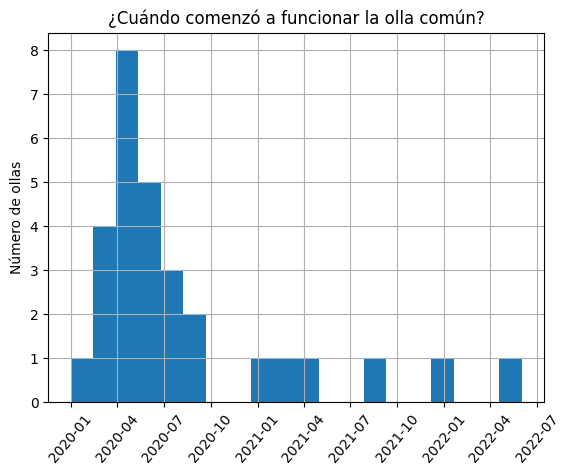

In [110]:
ax = fechas.hist(xrot=50, bins=20)
ax.set_title("¿Cuándo comenzó a funcionar la olla común?")
ax.set_ylabel("Número de ollas")
plt.show()

Text(0.5, 1.0, '¿Cuándo comenzó a funcionar la olla común?')

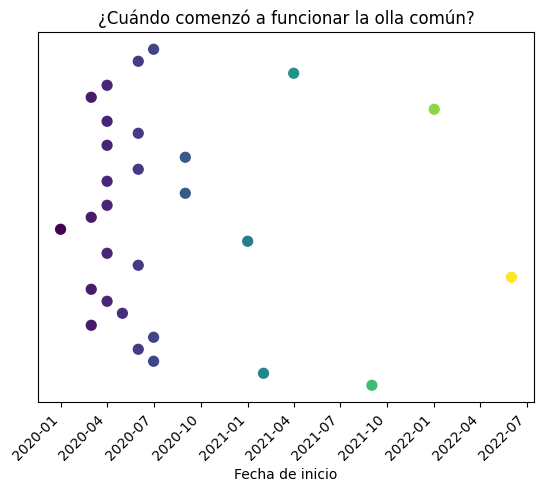

In [138]:
ax = (fechas
.rename("fechas")
.reset_index()
.plot.scatter("fechas", "index", s=50, c="fechas", cmap="Viridis")
)

ax.set_ylabel("")
ax.set_yticks([])
ax.set_xlabel("Fecha de inicio")
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=45, ha='right')
ax.set_title("¿Cuándo comenzó a funcionar la olla común?")



In [68]:
regis_cols = df.columns[df.columns.str.startswith('La olla común está registrada en')]

In [74]:
regis_cols

Index(['La olla común está registrada en: (puede marcar más de una opción)',
       'La olla común está registrada en: (puede marcar más de una opción)/Mancachay',
       'La olla común está registrada en: (puede marcar más de una opción)/RUOS - Municipio distrital',
       'La olla común está registrada en: (puede marcar más de una opción)/No está registrada',
       'La olla común está registrada en: (puede marcar más de una opción)/Otro'],
      dtype='object')

In [75]:
title= {'La olla común está registrada en: (puede marcar más de una opción)': '¿Dónde está registrada la olla común?',
 'La olla común está registrada en: (puede marcar más de una opción)/Mancachay': 'La olla común está registrada en Mancachay',
 'La olla común está registrada en: (puede marcar más de una opción)/RUOS - Municipio distrital': 'La olla común está registrada en RUOS - Municipio distrital',
 'La olla común está registrada en: (puede marcar más de una opción)/Otro': 'La olla común está registrada en Otra opción',
 'La olla común está registrada en: (puede marcar más de una opción)/No está registrada': 'La olla común no está registrada'}

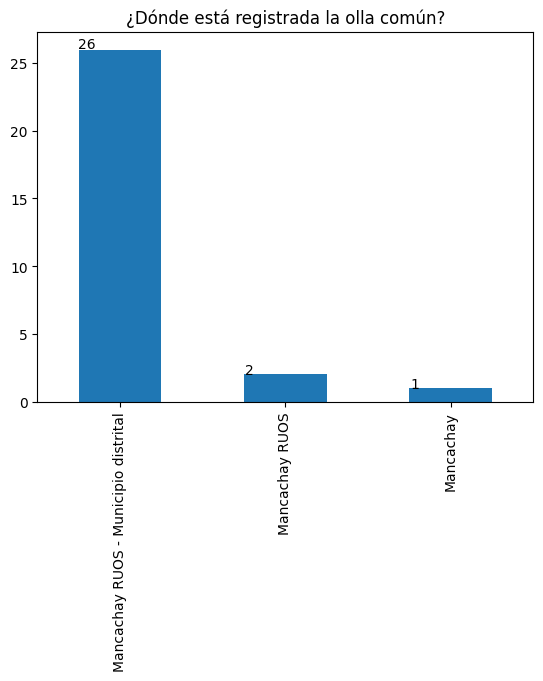

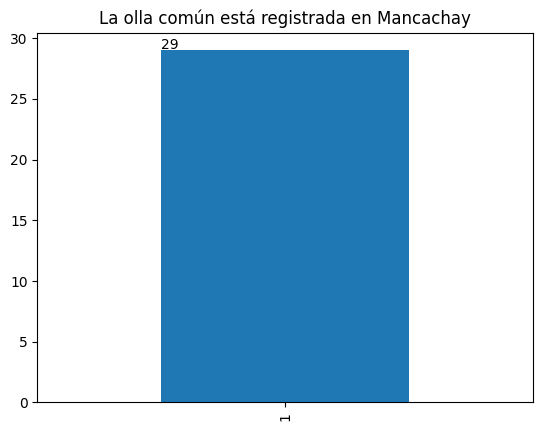

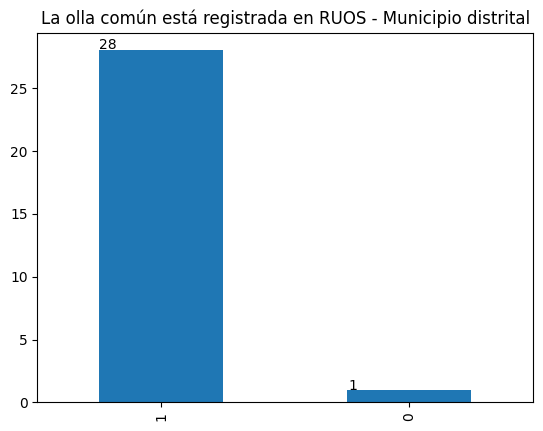

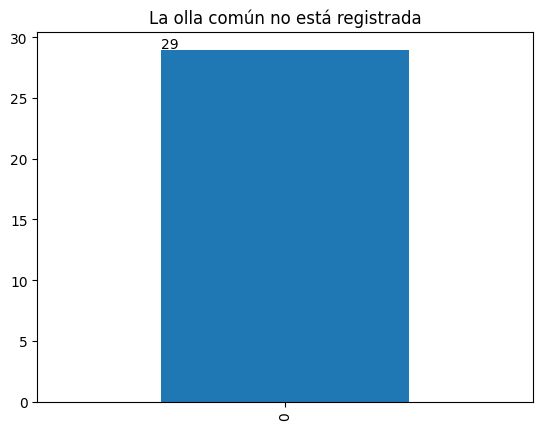

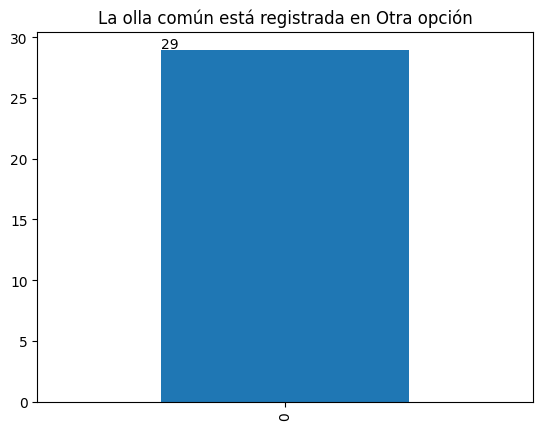

In [84]:
for col in regis_cols:
    ax = df[col].value_counts().plot.bar()
    ax.set_title(title[col])
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    plt.show()

In [89]:
socios_cols = ['En el momento de su conformación ¿Cuántos socios y socias conformaban la olla común (Padrón)? (coloque sólo el número, por ejemplo: 15)',
               'En la actualidad ¿Cuántos socios y socias conforman la olla común (Padrón)? (coloque sólo el número, por ejemplo: 15)',
               'En la actualidad ¿Cuántas mujeres son socias de la olla común? (coloque sólo el número, por ejemplo: 5)']

In [93]:
df[socios_cols].describe().round(2).to_clipboard()

In [96]:
df['¿Cuánto cobran por ración? (coloque sólo el número y para los céntimos utilice un punto, por ejemplo: 1.5 o 2.0)'].describe().to_clipboard()

In [97]:
comidas_cols = ["¿Qué comidas ofrece la olla común? (puede marcar más de una opción)",
                "¿Qué comidas ofrece la olla común? (puede marcar más de una opción)/Desayuno",
                "¿Qué comidas ofrece la olla común? (puede marcar más de una opción)/Almuerzo",
                "¿Qué comidas ofrece la olla común? (puede marcar más de una opción)/Lonche",
                "¿Qué comidas ofrece la olla común? (puede marcar más de una opción)/Cena"]

In [99]:
titles = ["¿Qué comidas ofrece la olla común?",
          "La olla común ofrece desayuno",
          "La olla común ofrece almuerzo",
          "La olla común ofrece lonche",
          "La olla común cena",
]

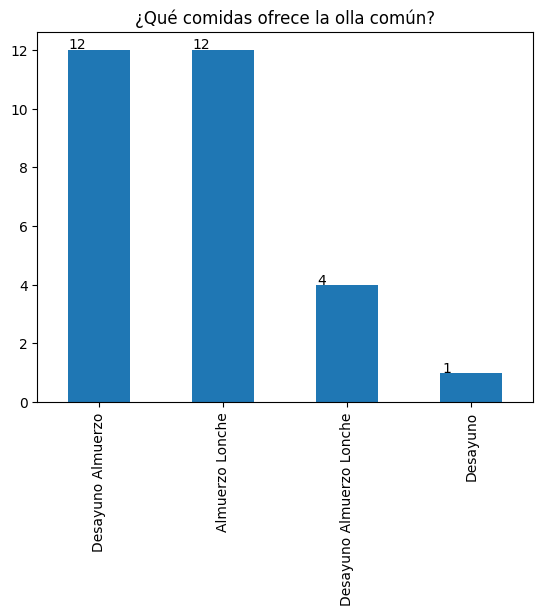

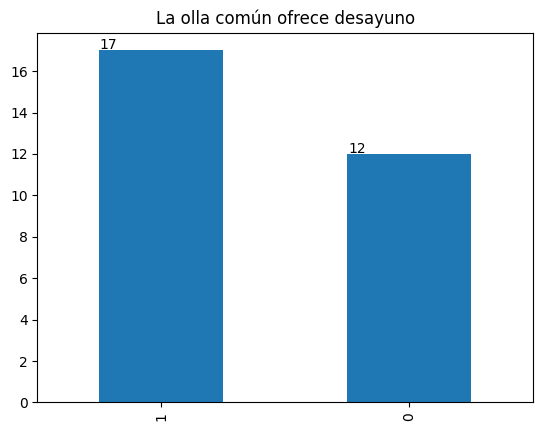

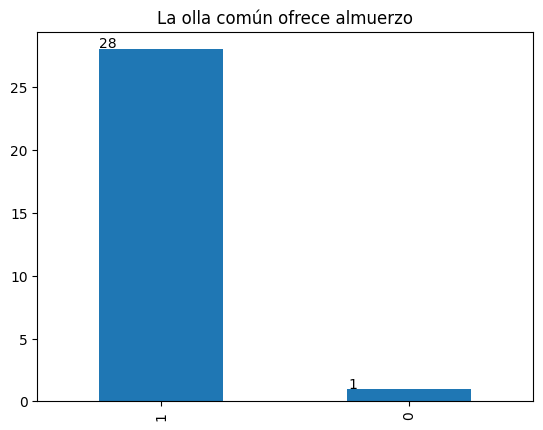

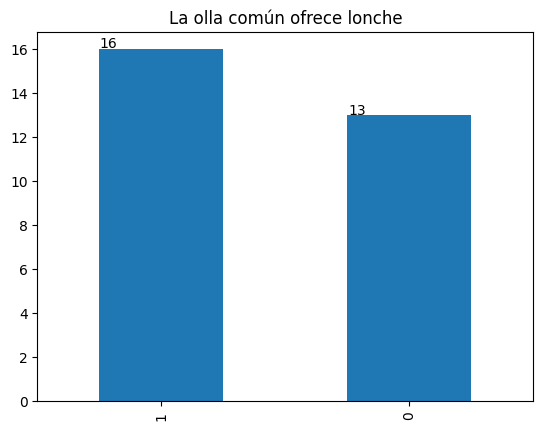

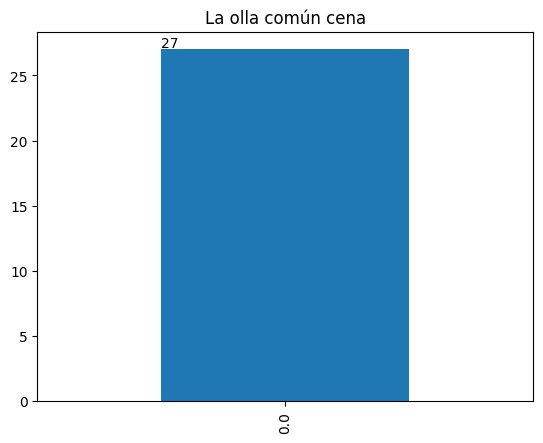

In [102]:
for i, col in enumerate(comidas_cols):
    ax = df[col].value_counts().plot.bar()
    ax.set_title(titles[i])
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    plt.show()

In [107]:
equip_cols = ["La olla común cuenta con: (marque todas las que correspondan)",
"La olla común cuenta con: (marque todas las que correspondan)/Menajes (ollas, cubiertos, cuchillos, etc.)", 
"La olla común cuenta con: (marque todas las que correspondan)/Refrigeradora",
"La olla común cuenta con: (marque todas las que correspondan)/Equipamientos (cocina, mesas, etc.)",
"La olla común cuenta con: (marque todas las que correspondan)/Reservorios de agua"]


In [108]:
titles_equip = ["La olla común cuenta con:", "La olla común cuenta con Menajes", "La olla común cuenta con Refrigerador", "La olla común cuenta con Equipamientos", "La olla común cuenta con Reservorios de agua"]

In [143]:
df[["La olla común cuenta con: (marque todas las que correspondan)/Menajes (ollas, cubiertos, cuchillos, etc.)", 
"La olla común cuenta con: (marque todas las que correspondan)/Refrigeradora",
"La olla común cuenta con: (marque todas las que correspondan)/Equipamientos (cocina, mesas, etc.)",
"La olla común cuenta con: (marque todas las que correspondan)/Reservorios de agua"]]  = df[["La olla común cuenta con: (marque todas las que correspondan)/Menajes (ollas, cubiertos, cuchillos, etc.)", 
"La olla común cuenta con: (marque todas las que correspondan)/Refrigeradora",
"La olla común cuenta con: (marque todas las que correspondan)/Equipamientos (cocina, mesas, etc.)",
"La olla común cuenta con: (marque todas las que correspondan)/Reservorios de agua"]].replace({1:"Sí", 0:"No"})

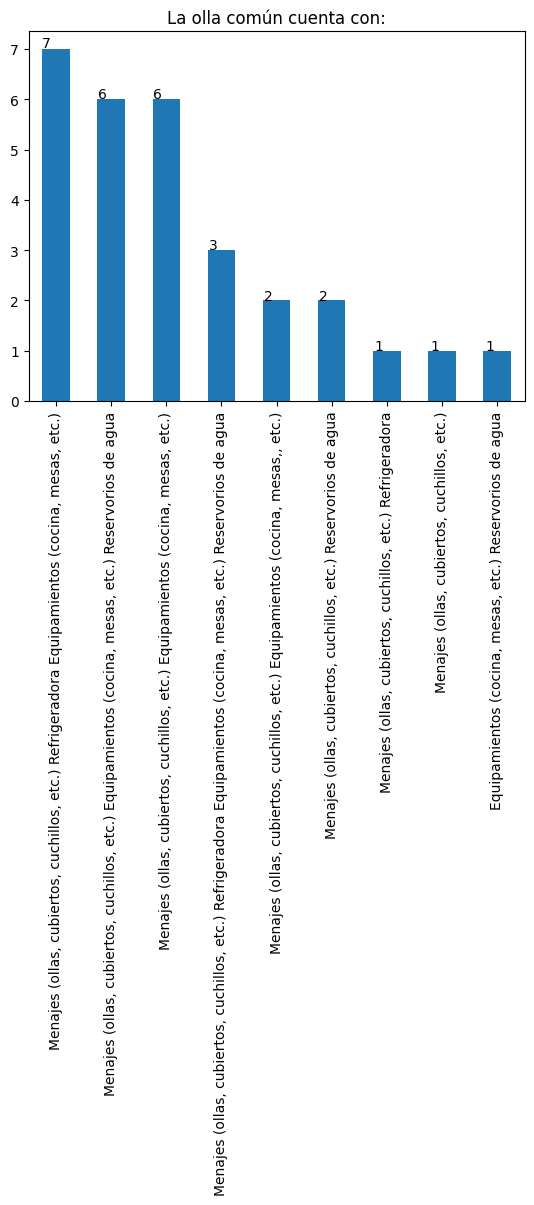

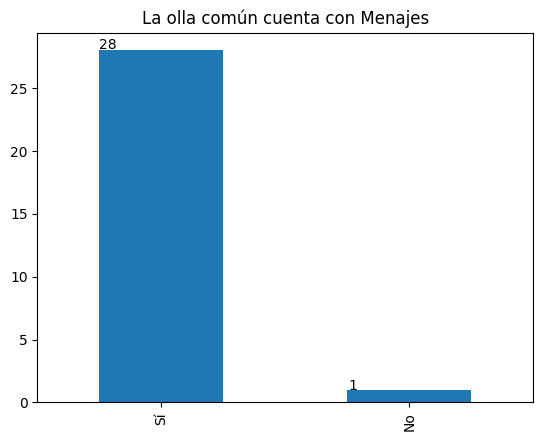

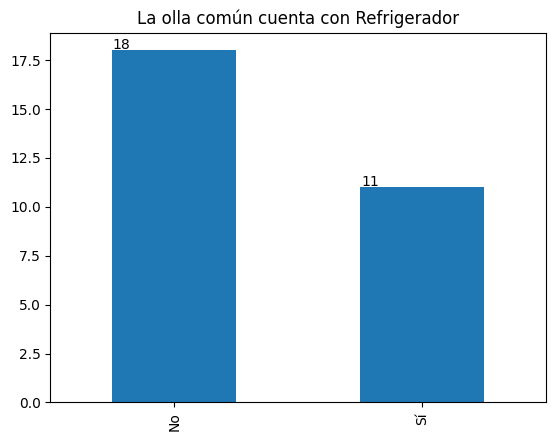

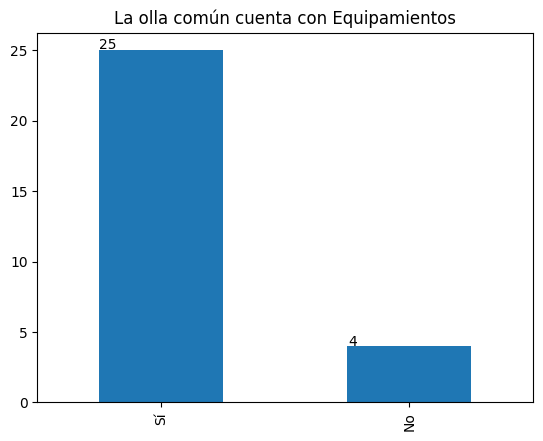

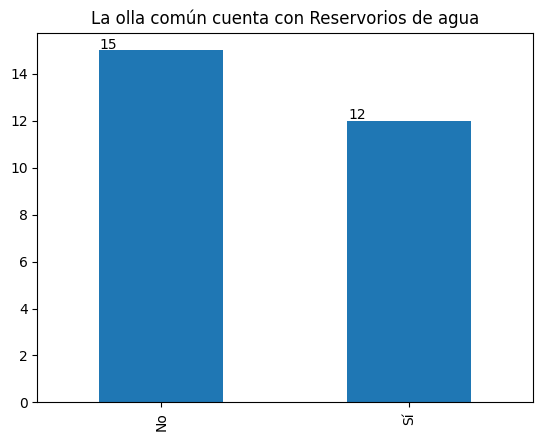

In [144]:
for i, col in enumerate(equip_cols):
    ax = df[col].value_counts().plot.bar()
    ax.set_title(titles_equip[i])
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    plt.show()